# Case Study 1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://cdn.oreillystatic.com/oreilly/booksamplers/9781449367619_sampler.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Twitter Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using twitter data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
'''Using Twitter API and hashtag #SuperBowl, we are going to download twitter data about the superbouwl.
Then we are going to use the volume of fan used hashtags to understand which team had more support from their fans and other interesting topics'''























## Data Collection: Download Twitter Data using API

* In order to solve the above problem, you need to collect some twitter data. You could select a topic that is relevant to your problem, and use Twitter API to download the relevant tweets. It is recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [1]:
import twitter
import json
import io
from urllib import unquote
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information
    # on Twitter's OAuth implementation.

    CONSUMER_KEY = 'Rs8Ba8b7AOL7IDVIHljuVBERC'
    CONSUMER_SECRET ='84xMvqAD4dfndq29a4RzarCUufdJ9hBHZKcLctqayJXRH6LbLA'
    OAUTH_TOKEN = '389922744-Km3NZ6rShZqSHZ3ZPh24lLBSVxGVqybX8r5B57f8'
    OAUTH_TOKEN_SECRET = 'lJDLpjjyx9QwcCffCJZr4dYKo7aqNwdO7skbjeHxJWZLs'

    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)

    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
twitter_api = oauth_login()

# searching for tweets with #SuperBowl
q = '#SuperBowlLII'
count = 100

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

for _ in range(19):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e:
        break

    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# save 2000 tweets into .json file
with io.open('superbowl.json','w', encoding='utf-8') as f:
        f.write(unicode(json.dumps(statuses, ensure_ascii=False)))


Length of statuses 93


### Report  statistics about the tweets you collected 

In [4]:
# The total number of tweets collected:  <2000>
# We built this code the day before the superbowl and used #SuperBowlLII as the hastag to collect data,
# but now after the superbowl, there is a smaller amount of data for us to collect, 
# so we added the json file with tweets we collected the day before the superbowl with around 2000 tweets for your reference



# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [17]:
import json
import io
from collections import Counter
from prettytable import PrettyTable
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk

nltk.download("stopwords")
nltk.download("twitter_samples")

def unwantWords():
    unwant = list(stopwords.words('english'))
    unwant += [ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9' 'https', 'http', 'I', 'RT', 'The', 'time', 'half', 'like', 'de', 'el', 'I\'m', ]
    return unwant

#load the tweets collected in the local file (json)
with io.open('superbowlLLI.json',encoding='utf-8') as f:
    statuses = json.load(f)

status_texts = [ status['text']
                 for status in statuses ]

screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text']
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

user_ids = [ user_mention['id']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

words = []
unwantedwords = unwantWords()
for t in status_texts:
    for w in t.split():
        if(w not in unwantedwords):
            words.append(w)

# Compute the frequencies of the words being used in these tweets.
counts = Counter(words)

# Plot a table of the top 30 most-frequent words with their counts
pt = PrettyTable(field_names=['words', 'Count'])
c = Counter(words)
[ pt.add_row(kv) for kv in c.most_common()[:30] ]
pt.align['words'], pt.align['Count'] = 'l', 'r' # Set column alignment
print pt 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ostavre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ostavre\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
+-------------------+-------+
| words             | Count |
+-------------------+-------+
| #SuperBowl        |  2398 |
| Justin            |   221 |
| #superbowl        |   213 |
| show              |   204 |
| #HalftimeShow     |   125 |
| #PepsiHalftime    |   124 |
| Timberlake        |   118 |
| halftime          |   117 |
| @jtimberlake      |   117 |
| #Superbowl        |   111 |
| que               |   109 |
| #Eagles           |   101 |
| Tom               |    99 |
| la                |    97 |
| Eagles            |    92 |
| Brady             |    88 |
| en                |    84 |
| del               |    83 |
| If                |    82 |
| ge

** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [18]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
retweets = [(status['retweeted_status']['retweet_count'],
             status['text']) 
            for status in statuses 
                  if 'text' in status and 'retweeted_status' in status]

distinct_retweets = []
id_set = set()
for retweet in retweets:
    if retweet[1] not in id_set:
        id_set.add(retweet[1])
        distinct_retweets.append(retweet)

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Text'])
[ pt.add_row(row) for row in sorted(distinct_retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+----------------------------------------------------+
| Count | Text                                               |
+-------+----------------------------------------------------+
| 10378 | RT @nickjonas: Wow @ladygaga killed the halftime   |
|       | show. Well done #Superbowl                         |
| 7862  | RT @BleacherReport: RT if ya got Philly in the     |
|       | #SuperBowl                                         |
|       |                                                    |
|       | Looking for their 1st title in franchise history.  |
|       | https://t.co/rW4MiqA795                            |
| 7073  | RT @NOTSportsCenter: Tom Brady, trying to catch a  |
|       | pass: #SuperBowl https://t.co/fZlzALlwKW           |
| 6912  | RT @BleacherReport: Eagles ran out to 'Dreams      |
|       | &amp; Nightmares 🔥 🔥 🔥                          |
|       |                                                    |
|       | #Superbowl                                      

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [19]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
for label, data in (('Hashtag', hashtags),
                    ('User', screen_names)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt






+------------------+-------+
| Hashtag          | Count |
+------------------+-------+
| SuperBowl        |  2536 |
| superbowl        |   218 |
| HalftimeShow     |   130 |
| PepsiHalftime    |   125 |
| Superbowl        |   117 |
| Eagles           |   110 |
| SBLII            |    71 |
| Patriots         |    70 |
| JustinTimberlake |    69 |
| FlyEaglesFly     |    62 |
+------------------+-------+
+-----------------+-------+
| User            | Count |
+-----------------+-------+
| jtimberlake     |   148 |
| BleacherReport  |    70 |
| NFoles_9        |    34 |
| Eagles          |    33 |
| pepsi           |    28 |
| sehlinger3      |    27 |
| NFL             |    24 |
| Patriots        |    23 |
| NOTSportsCenter |    22 |
| MineGreenEyes   |    20 |
+-----------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

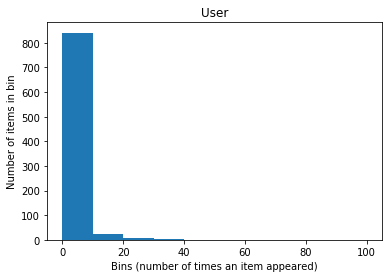

In [20]:
import matplotlib.pyplot as plt
bins=[0, 10, 20, 30, 40, 50, 100]

# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


user_mentions = [ user_mention['id']
                  for status in statuses
                      for user_mention in status['entities']['user_mentions']]

c = Counter(user_mentions)
plt.hist(c.values(),bins)
    
# Add a title and y-label ...
plt.title(label)
plt.ylabel("Number of items in bin")
plt.xlabel("Bins (number of times an item appeared)")
    
# ... and display as a new figure
plt.figure()
plt.show()




 ** (4) Getting "All" friends and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [21]:
import json
import io
from collections import Counter
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import twitter
import tweepy
import sys
import time
from urllib2 import URLError
from httplib import BadStatusLine
import json
import twitter
from functools import partial
from sys import maxint

# use tweepy to convert friends and followers id to name
auth = tweepy.OAuthHandler('Rs8Ba8b7AOL7IDVIHljuVBERC', '84xMvqAD4dfndq29a4RzarCUufdJ9hBHZKcLctqayJXRH6LbLA')
auth.set_access_token('389922744-Km3NZ6rShZqSHZ3ZPh24lLBSVxGVqybX8r5B57f8', 'lJDLpjjyx9QwcCffCJZr4dYKo7aqNwdO7skbjeHxJWZLs')
api = tweepy.API(auth)
public_tweets = api.home_timeline()

# function to make twitter request
def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw):

    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):

        if wait_period > 3600: # Seconds
            print >> sys.stderr, 'Too many retries. Quitting.'
            raise e
        if e.e.code == 401:
            print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
            return None
        elif e.e.code == 404:
            print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        elif e.e.code == 429:
            print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
            if sleep_when_rate_limited:
                print >> sys.stderr, "Retrying in 15 minutes...ZzZ..."
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print >> sys.stderr, '...ZzZ...Awake now and trying again.'
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print >> sys.stderr, 'Encountered %i Error. Retrying in %i seconds' % \
                (e.e.code, wait_period)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e
    wait_period = 2
    error_count = 0

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError, e:
            error_count = 0
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError, e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print >> sys.stderr, "URLError encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise
        except BadStatusLine, e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print >> sys.stderr, "BadStatusLine encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise

# function to find the friends' and followers' id
def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxint, followers_limit=maxint):

    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"

    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids,
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids,
                                count=5000)

    friends_ids, followers_ids = [], []

    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"],
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:

        if limit == 0: continue

        cursor = -1
        while cursor != 0:

            # Use make_twitter_request via the partially bound callable...
            if screen_name:
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']

            print >> sys.stderr, 'Fetched {0} total {1} ids for {2}'.format(len(ids),
                                                    label, (user_id or screen_name))

            if len(ids) >= limit or response is None:
                break

    return friends_ids[:friends_limit], followers_ids[:followers_limit]

# get friends and followers' id
friends_ids, followers_ids = get_friends_followers_ids(twitter_api,
                                                       screen_name="Patriots",
                                                       friends_limit=20,
                                                       followers_limit=20)

# get friends and followers' names from ids by tweepy
friends_names = []
for i in friends_ids:
    u = api.get_user(i)
    friends_names.append(u.screen_name)
followers_names = []
for i in followers_ids:
    u = api.get_user(i)
    followers_names.append(u.screen_name)

# show 20 friends and followers by prettyTable
x = PrettyTable(['friends_id','friends_name'])
x.align['friends_id'] = 'l'
x.align['friends_name'] = 'l'
x.padding_width = 1
for i in range(len(friends_ids)):
    x.add_row([friends_ids[i],friends_names[i]])

y = PrettyTable(['followers_id','followers_name'])
y.align['followers_id'] = 'l'
y.align['followers_name'] = 'l'
y.padding_width = 1
for i in range(len(followers_ids)):
    y.add_row([followers_ids[i],followers_names[i]])

print (x)
print (y)


Fetched 193 total friends ids for Patriots
Fetched 5000 total followers ids for Patriots


+--------------------+-----------------+
| friends_id         | friends_name    |
+--------------------+-----------------+
| 358321187          | KennyBritt_18   |
| 222365692          | jharrison9292   |
| 29591828           | Rbjf_99         |
| 284649974          | bhoyer7         |
| 420024283          | AJelks_50       |
| 2936470242         | KingCash_7191   |
| 201067405          | MFlowers59      |
| 236634910          | Dorsett_4       |
| 285795288          | Cole_Croston    |
| 339917281          | LANGI21         |
| 563193609          | C_hollister81   |
| 478873078          | hollister_jacob |
| 817536923547729921 | Marcuscannon61  |
| 157060778          | j_bademosi24    |
| 584036166          | MeganOBsports   |
| 59471027           | Jaguars         |
| 884907632426971136 | BostonUprising  |
| 517168472          | wisehog94       |
| 190630003          | ConorMcD68      |
| 1523664978         | Tony_Garcia53   |
+--------------------+-----------------+
+---------------

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [13]:
# The quetion we are trying to answer is: Which one of the SuperBowl teams has more fan support. 
# Our approach to doing this is to compare the number of tweets that have #GoPats as Patriot supports and #FlyEaglesFly as Eagles support









Write codes to implement the solution in python:

In [24]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import json
import io
from collections import Counter
from prettytable import PrettyTable

#load the tweets collected in the local file (json)
with io.open('SuperBowlLII.json',encoding='utf-8') as f:
    statuses = json.load(f)

status_texts = [ status['text']
                 for status in statuses ]

screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text']
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

user_ids = [ user_mention['id']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

words = [ w
          for t in status_texts
              for w in t.split() ]

# Compute the frequencies of the words being used in these tweets.
counts = Counter(words)

# Plot a table of the top 30 most-frequent words with their counts
pt = PrettyTable(field_names=['words', 'Count'])
c = Counter(words)
[ pt.add_row(kv) for kv in c.most_common()[:30] ]
pt.align['words'], pt.align['Count'] = 'l', 'r' # Set column alignment
#print pt 


for label, data in (('User', screen_names),('Hashtag', hashtags)
                    ):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    #print pt



print "#FlyEaglesFly:",c['FlyEaglesFly']
print "#Eagles:", c['Eagles']

print "#GoPats:",c['GoPats']
print "#Patriots:",c['Patriots']
















#FlyEaglesFly: 435
#Eagles: 57
#GoPats: 13
#Patriots: 39


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


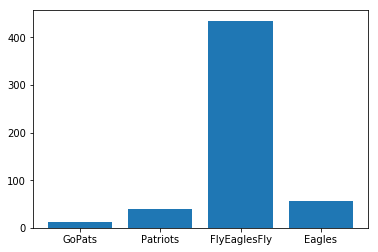

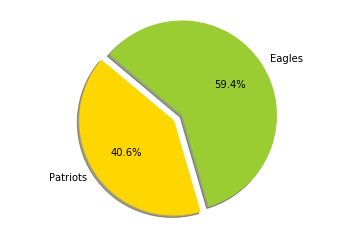

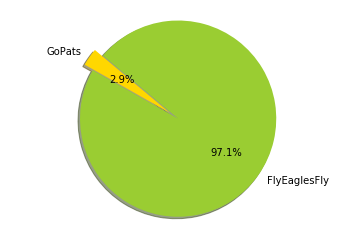

In [25]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import matplotlib.pyplot as plt
import numpy as np
x = np.arange(4)
money = [c['GoPats'], c['Patriots'], c['FlyEaglesFly'], c['Eagles']]
fig, ax = plt.subplots()
#ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('GoPats', 'Patriots', 'FlyEaglesFly', 'Eagles'))
plt.show()


import matplotlib.pyplot as plt

# Data to plot
labels = 'Patriots', 'Eagles'
sizes = [c['Patriots'], c['Eagles']]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Data to plot
labels = 'GoPats', 'FlyEaglesFly'
sizes = [c['GoPats'], c['FlyEaglesFly']]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()







*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 1".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (5 points) how well did the team describe the problem they are trying to solve using twitter data? 
       0: not clear
       1: I can barely understand the problem
       2: okay, can be improved
       3: good, but can be improved
       4: very good
       5: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection:
    ----------------------------------
    
    3. (10 points) Do you think the data collected are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale (> 300 tweets)
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    (1) Word Count (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular tweets in your collection of tweets: (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (3) Find popular twitter entities  (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    (4) Find user's followers and friends (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? 
       0: not relevant
       1: barely relevant to the problem
       2: okay solution, but there is an easier solution.
       3: good, but can be improved
       4: very good, but solution is simple/old
       5: innovative and technically sound
       
    7. how well did the team implement the solution in python? 
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think the results they found in the data? 
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  
       -1: I vote the other team is better than this team
        0: the same
        1: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9
       10: Team 10

